##**Business issue**

A company wants to analyze the distribution of employee performance
to understand the gaps and identify outliers.



                                      



We download ther dataset from https://www.kaggle.com/datasets/rhuebner/human-resources-data-set.




Dr. Carla Patalano and Dr. Rich Huebner are the original authors of this dataset.



## **Objective** :


Study the distributions of performance scores and hours worked to detect factors for improvement.


## Packages Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importation

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Human_Ressource_DA_project/HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
df.shape

(311, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
df.describe() # For numerical variables

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


The DataFrame has 311 records with IDs ranging from 10001 to 10311. Approximately 40% of employees are married (MarriedID) and 9% come from a diversity job fair (FromDiversityJobFairID), while GenderID indicates an uneven gender distribution. Other categorical variables (MaritalStatusID, EmpStatusID, DeptID, PerfScoreID, PositionID) represent various levels. Quantitatively, salaries range from 45,046 to 250,000
(mean 69,021), with overall positive engagement (4.11) and satisfaction
(~3.89) scores, and measures of tardiness and absences showing diverse attendance patterns.

In [6]:
df.describe(include = ["object"]) # For categorical variables

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


 Every employee has a unique name, while “Production Technician I” appears most often in Position (137 times) and Massachusetts “MA” is the most common State. Note that some columns like DateofTermination have fewer entries (104) due to missing data. Overall, the results provide a quick overview of the diversity and distribution of categorical attributes such as gender, marital status, citizenship, and recruitment source

In [7]:
df.isna().sum()

,0
Employee_Name,0
EmpID,0
MarriedID,0
MaritalStatusID,0
GenderID,0
EmpStatusID,0
DeptID,0
PerfScoreID,0
FromDiversityJobFairID,0
Salary,0


The 207 missing values in "Date of Termination" indicate that these employees are still working at the company.                       
      Therefore, we will keep the NA values.


## Visualization of distributions

### For the categorical variables

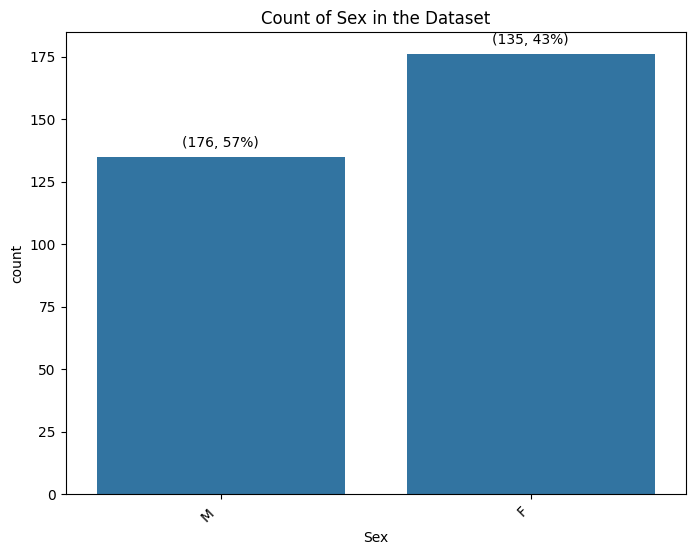

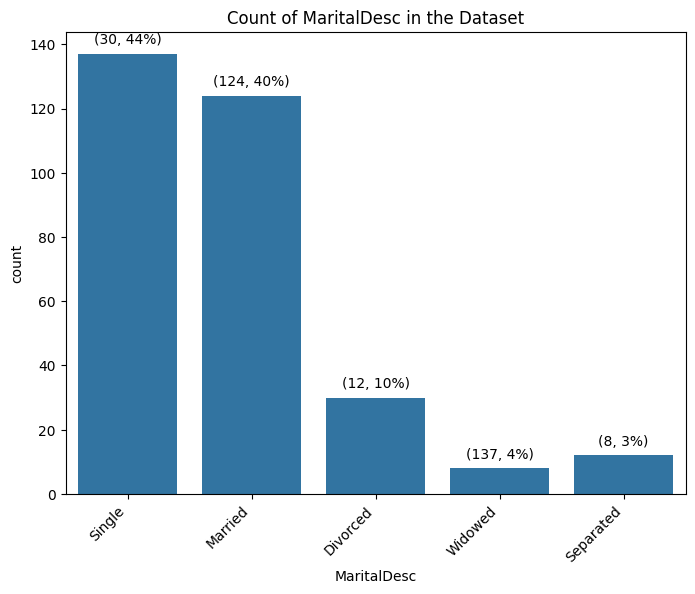

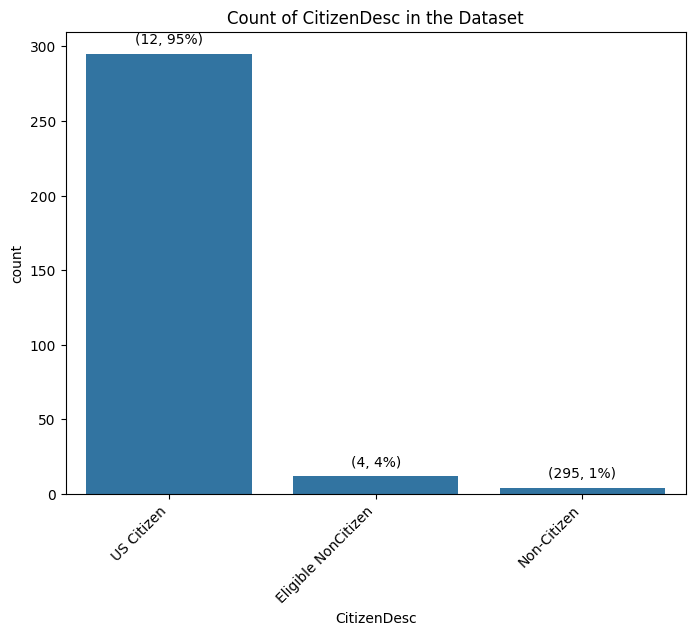

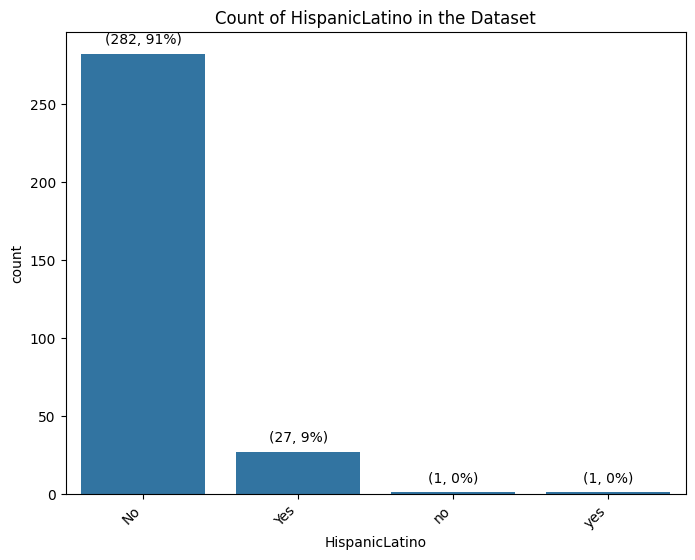

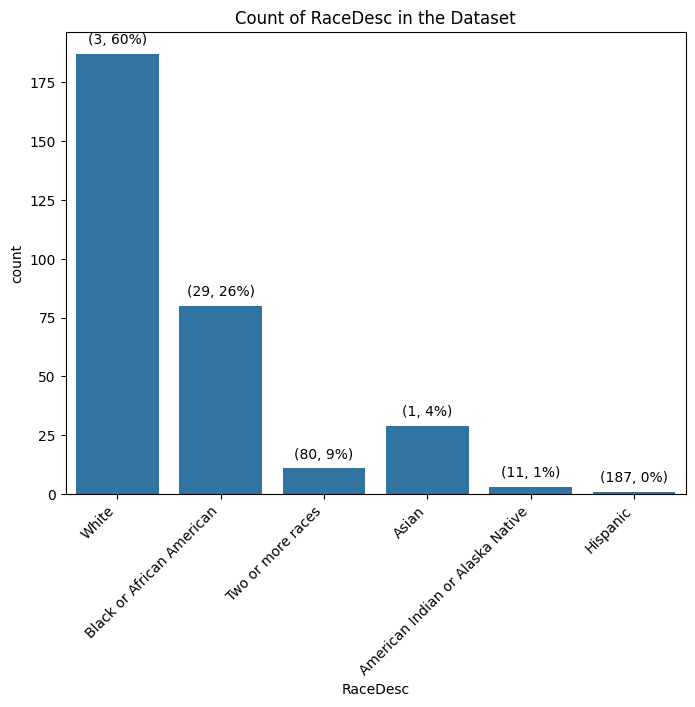

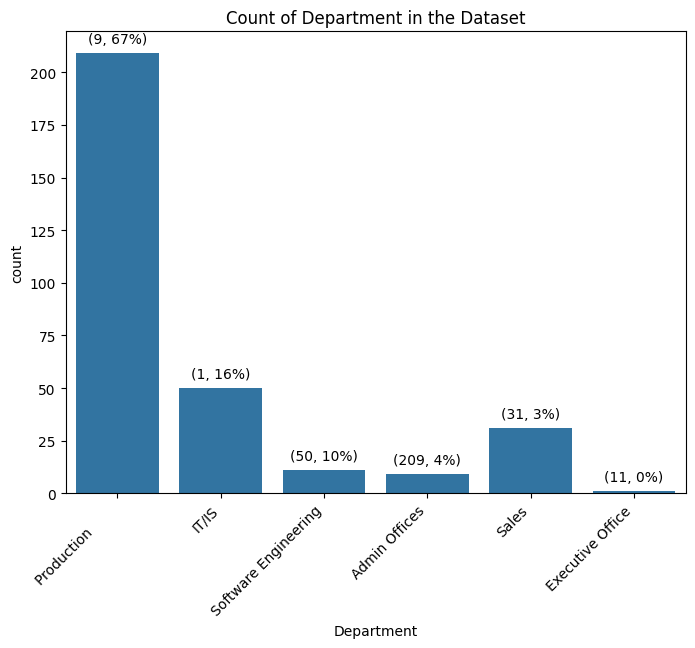

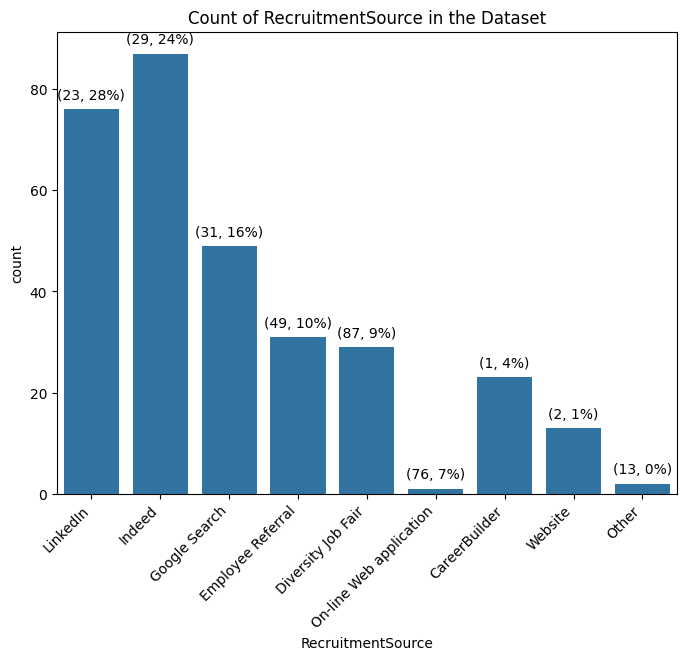

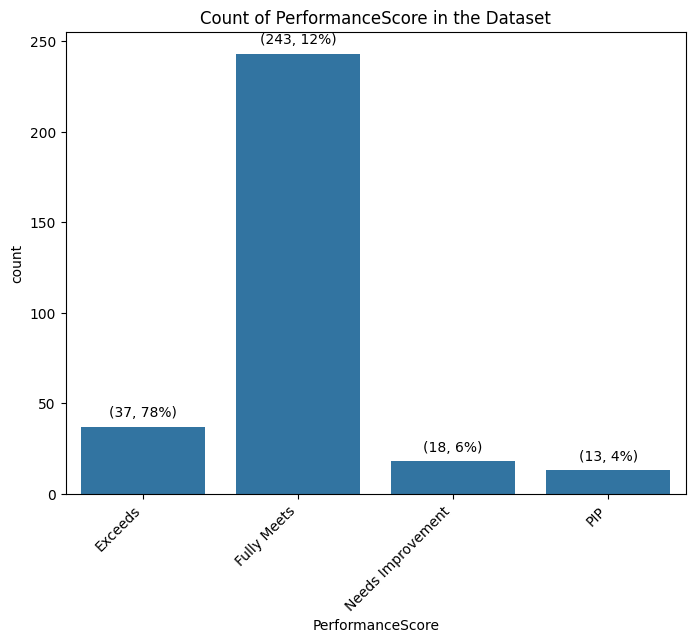

In [8]:
# List of variables to exclude from the graphs, as their visualizations may not be meaningful or aesthetically pleasing
exclude_columns = [
    "Position", "Employee_Name", "State", "DOB",
    "DateofHire", "DateofTermination", "TermReason",
    "LastPerformanceReview_Date", "ManagerName", "EmploymentStatus"
]

# Graphs for categorical variables
# Loop through categorical columns (using include=["object"] to select categorical variables)
for col in df.describe(include=["object"]).columns:
    if col not in exclude_columns:
        # Bar plot for the frequency of each category
        plt.figure(figsize=(8,6))
        ax = sns.countplot(x=col, data=df)
        plt.title(f"Count of {col} in the Dataset")

        # Add count and proportion of each category on the bars
        prop_df = df[col].value_counts(normalize=True).reset_index()
        prop_df.columns = [col, "proportion"]
        for p, prop, count in zip(ax.patches, prop_df["proportion"], df[col].value_counts().sort_index()):
            ax.annotate(f'({count}, {prop:.0%})', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

        # Rotate y-axis labels to avoid overlap
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to 45 degrees and align them to the right

        plt.show()


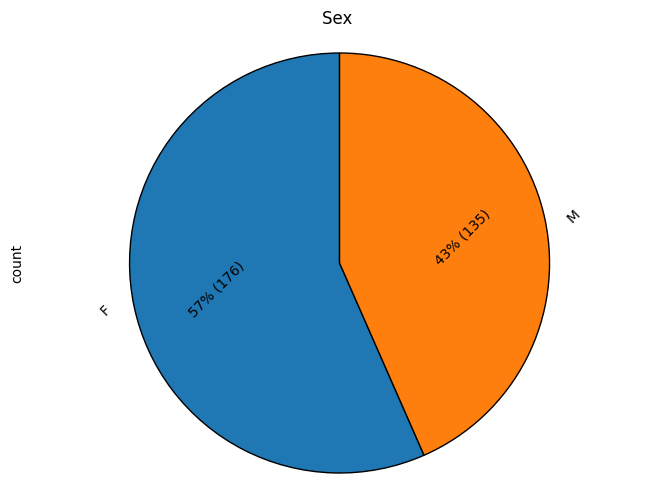

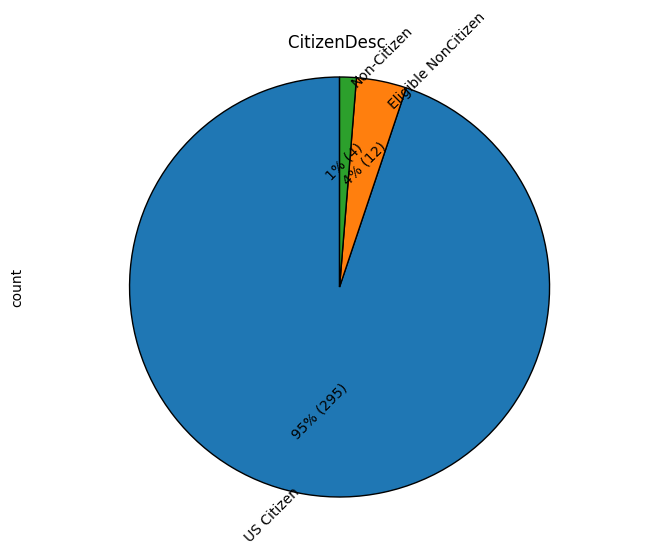

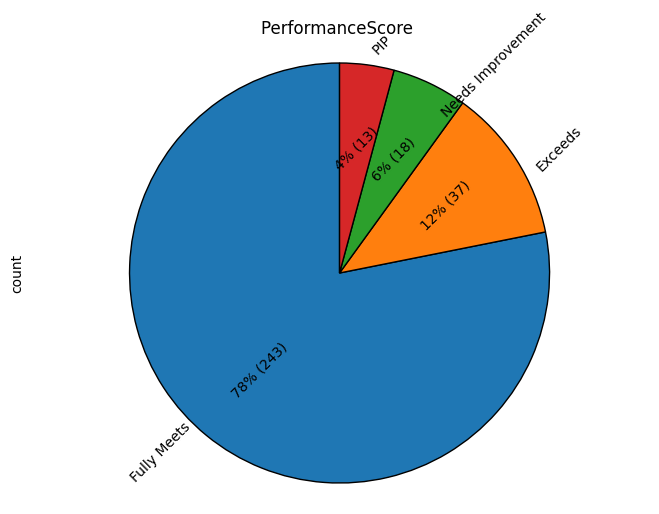

In [9]:
# Pie chart for each categorical variable, excluding specific columns
for col in df.describe(include=["object"]).columns:
    if col not in exclude_columns and col not in ["RecruitmentSource", "Department", "RaceDesc", "HispanicLatino", "MaritalDesc"]:
        plt.figure(figsize=(8,6))

        # Create pie chart with percentage labels
        ax = df[col].value_counts().plot(kind="pie",
                                         autopct=lambda x: f'{x:.0f}% ({x/100*len(df):.0f})',
                                         pctdistance=0.6,   # Keep the original position of percentage labels
                                         labeldistance=1.1,   # Adjust label distance for better clarity
                                         startangle=90,       # Start the chart at a fixed angle for better distribution
                                         wedgeprops={'linewidth': 1, 'edgecolor': 'black'})  # Add edge color for wedges

        # Rotate the percentage labels for better readability
        for label in ax.texts:
            label.set_rotation(45)  # Rotate labels by 45 degrees (adjust the degree as needed)

        # Add the title
        plt.title(f"{col} ")

        # Ensure the pie chart is circular
        plt.axis('equal')

        plt.show()


Bar chart (histogram-style) for "DateofHire" & "DateofTermination"

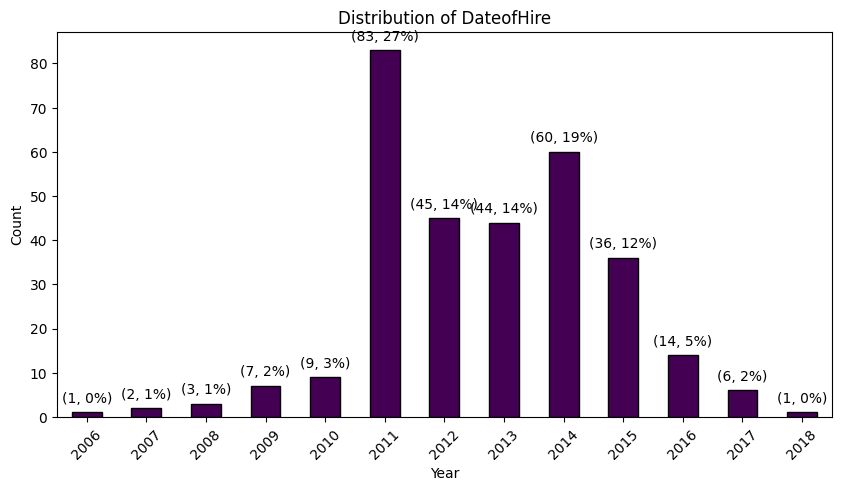

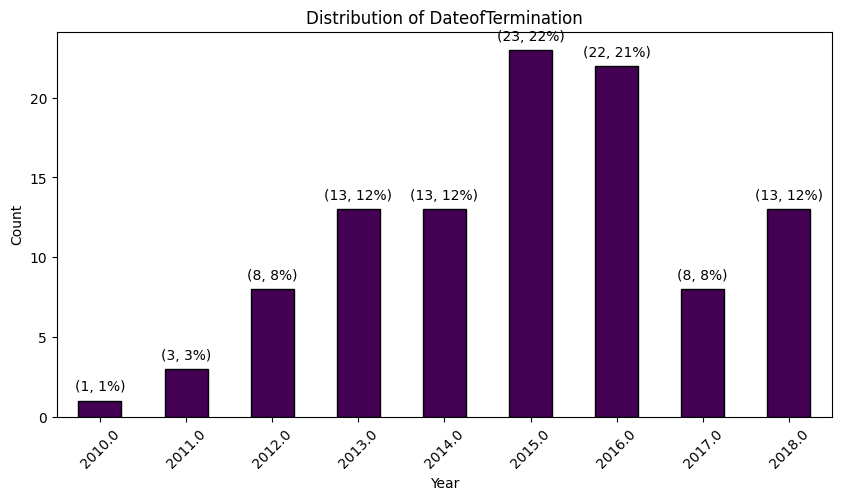

In [10]:
# Convert the date columns to datetime format
for col in ["DateofHire", "DateofTermination"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")  # Ensure proper datetime conversion

    # Create the histogram
    plt.figure(figsize=(10, 5))
    ax = df[col].dt.year.value_counts().sort_index().plot(kind="bar", edgecolor="black", colormap="viridis")

    # Add title and labels
    plt.title(f"Distribution of {col}")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add count and proportion annotations on bars
    total = len(df[col].dropna())  # Total non-null values
    for p in ax.patches:
        count = int(p.get_height())  # Get the count for the year
        proportion = count / total  # Calculate proportion
        ax.annotate(f'({count}, {proportion:.0%})',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

    plt.show()


Barplot of the Top 10 for "Position" & "Employee_Name"

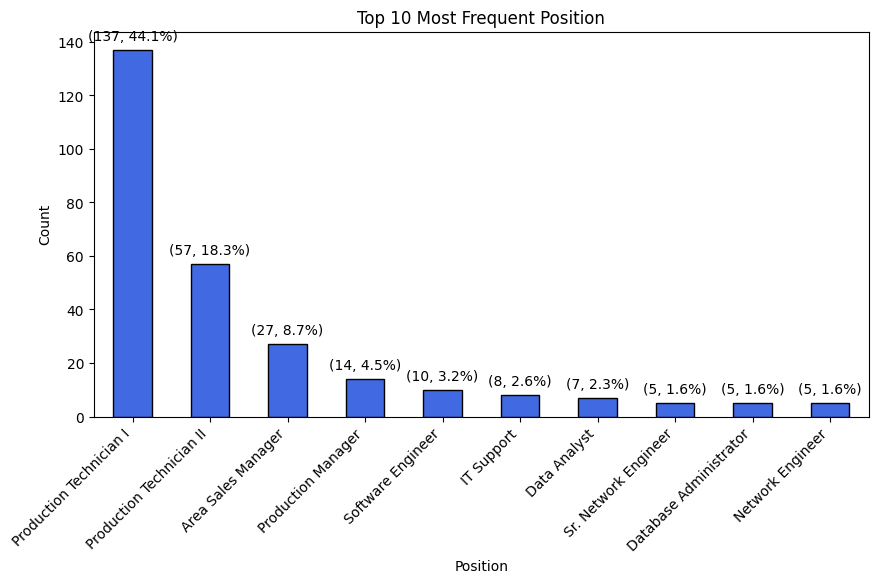

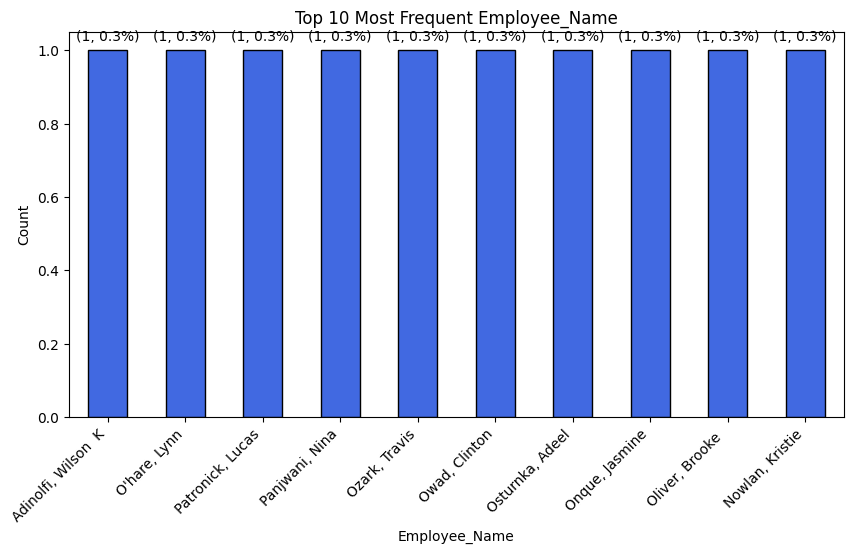

In [11]:
for col in ["Position", "Employee_Name"]:
    top_10 = df[col].value_counts().nlargest(10)  # Top 10 valeurs les plus fréquentes
    plt.figure(figsize=(10, 5))
    ax = top_10.plot(kind="bar", color="royalblue", edgecolor="black")

    # Ajout des étiquettes de valeur et proportion
    total = len(df[col].dropna())
    for p, count in zip(ax.patches, top_10):
        proportion = count / total
        ax.annotate(f'({count}, {proportion:.1%})',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

    plt.title(f"Top 10 Most Frequent {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()


State

In [12]:
!pip install plotly geopandas
!pip install us

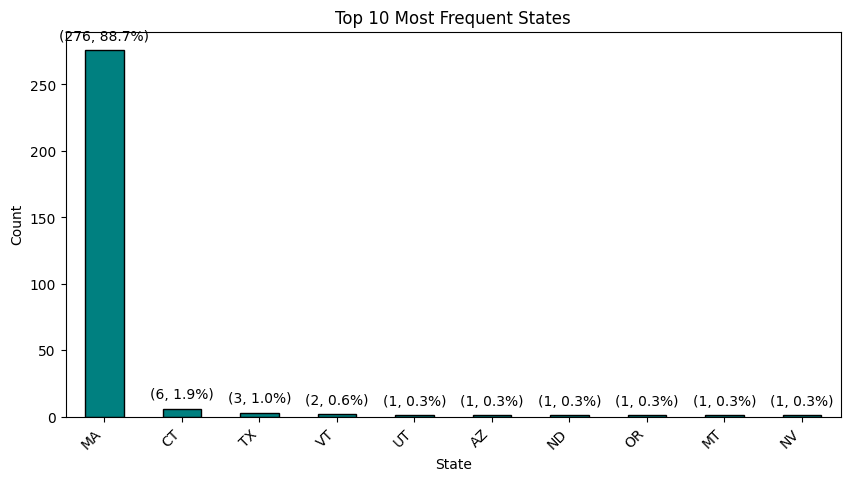

In [13]:
top_10_states = df["State"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
ax = top_10_states.plot(kind="bar", color="teal", edgecolor="black")

for p, count in zip(ax.patches, top_10_states):
    proportion = count / len(df["State"].dropna())
    ax.annotate(f'({count}, {proportion:.1%})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title("Top 10 Most Frequent States")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


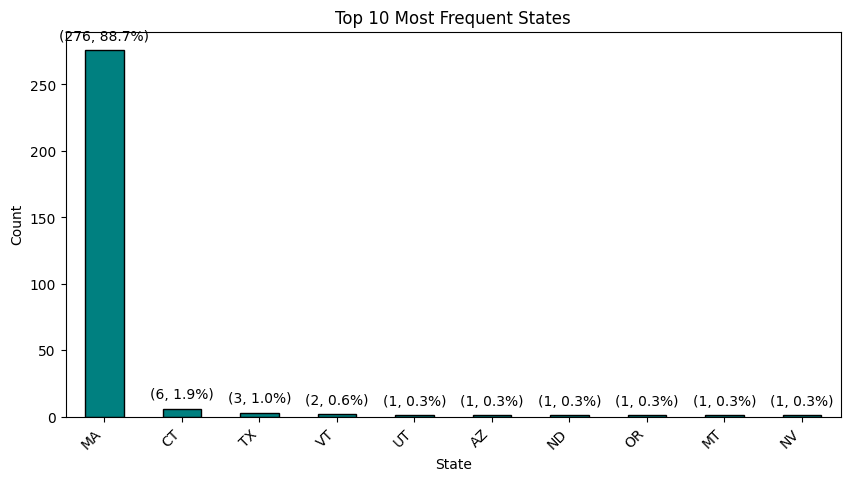

In [14]:
top_10_states = df["State"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
ax = top_10_states.plot(kind="bar", color="teal", edgecolor="black")

for p, count in zip(ax.patches, top_10_states):
    proportion = count / len(df["State"].dropna())
    ax.annotate(f'({count}, {proportion:.1%})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title("Top 10 Most Frequent States")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


Horizontal Barplot for "TermReason" & "EmploymentStatus"

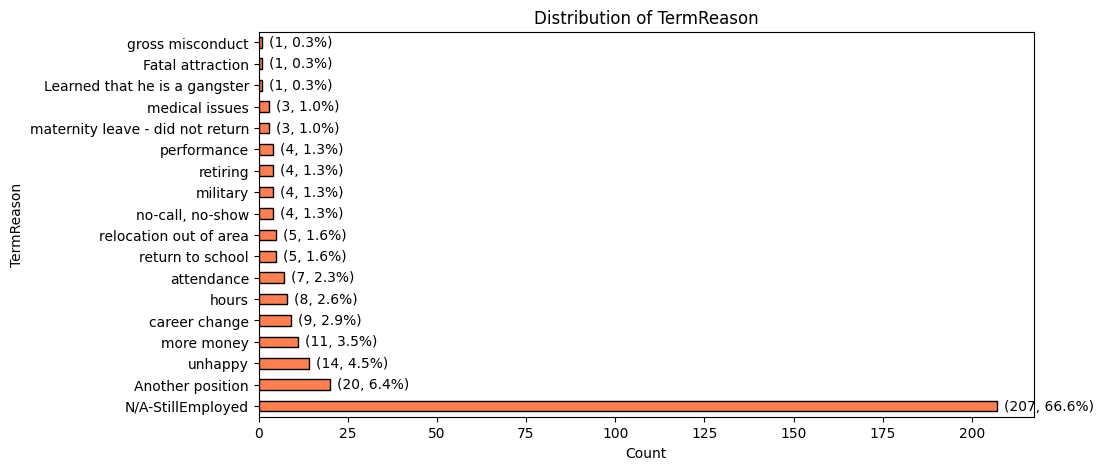

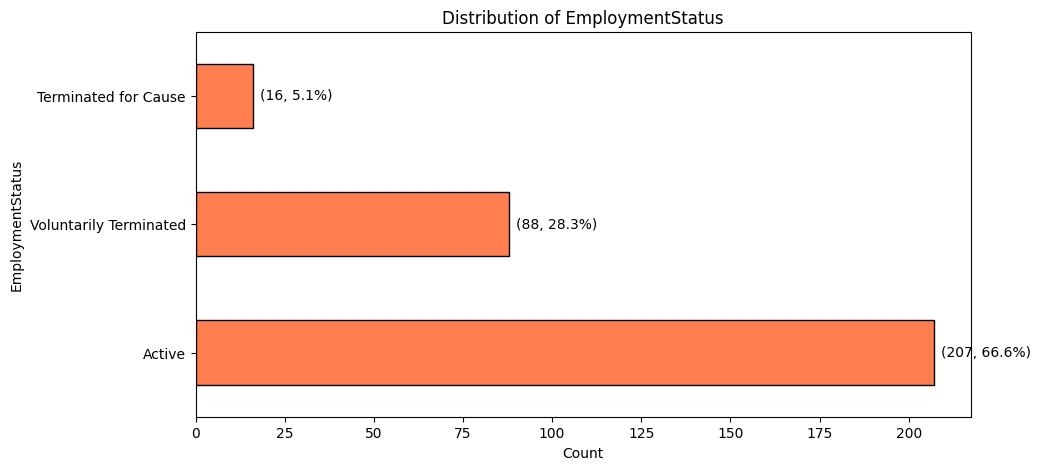

In [15]:
for col in ["TermReason", "EmploymentStatus"]:
    plt.figure(figsize=(10, 5))
    ax = df[col].value_counts().plot(kind="barh", color="coral", edgecolor="black")

    for p, count in zip(ax.patches, df[col].value_counts()):
        proportion = count / len(df[col].dropna())
        ax.annotate(f'({count}, {proportion:.1%})',
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()


Histogram by Year for "LastPerformanceReview_Date"

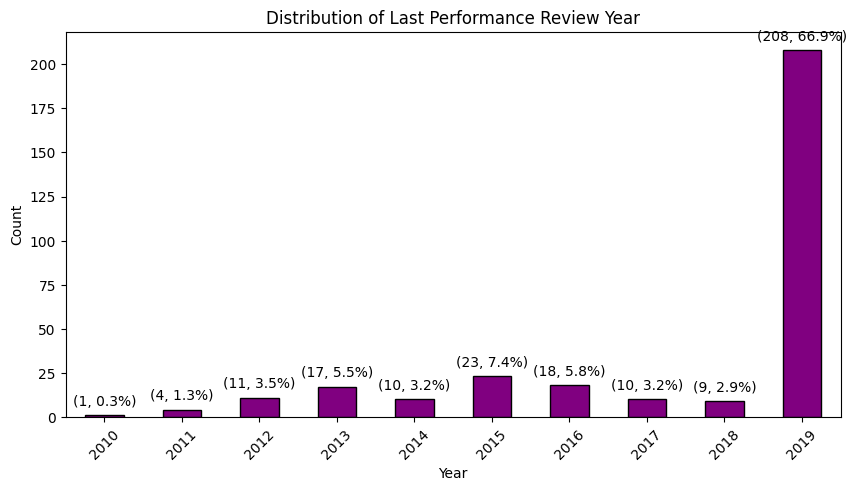

In [16]:
df["LastPerformanceReview_Date"] = pd.to_datetime(df["LastPerformanceReview_Date"], errors="coerce")

plt.figure(figsize=(10, 5))
ax = df["LastPerformanceReview_Date"].dt.year.value_counts().sort_index().plot(kind="bar", color="purple", edgecolor="black")

for p, count in zip(ax.patches, df["LastPerformanceReview_Date"].dt.year.value_counts().sort_index()):
    proportion = count / len(df["LastPerformanceReview_Date"].dropna())
    ax.annotate(f'({count}, {proportion:.1%})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title("Distribution of Last Performance Review Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### For numerical variables

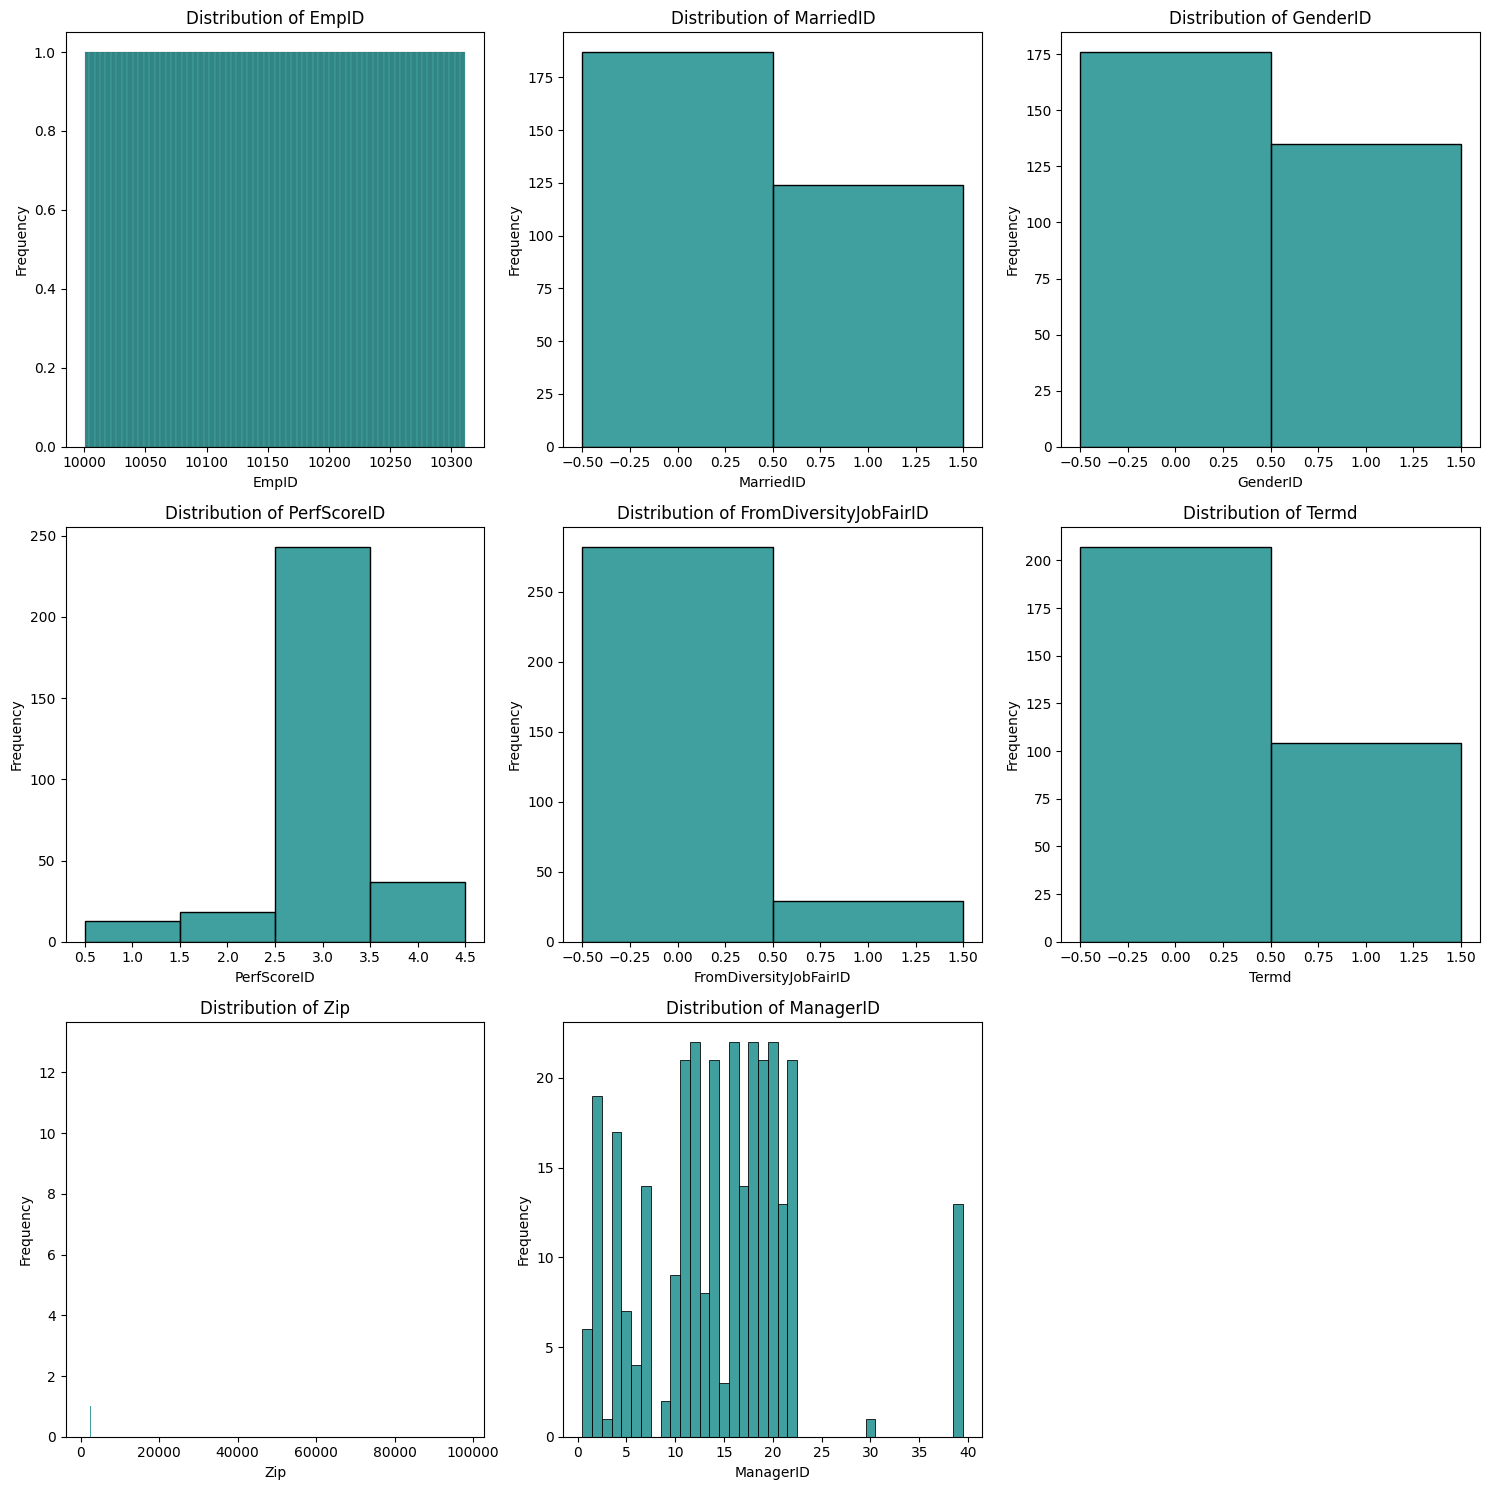

In [17]:
# Variables selected for histograms (discrete variables)
discrete_vars = ["EmpID", "MarriedID", "GenderID", "PerfScoreID",
                 "FromDiversityJobFairID", "Termd", "Zip", "ManagerID"]

# Create histograms for the selected discrete variables
num_plots = len(discrete_vars)  # Number of variables for histograms
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the required number of rows

# Adjust the figure height based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through the discrete variables and create histograms
for i, var in enumerate(discrete_vars, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns for the subplot
    sns.histplot(x=df[var].dropna().astype(int), discrete=True, color="teal", edgecolor="black")  # Create histogram
    plt.title(f"Distribution of {var}")  # Title of the histogram
    plt.xlabel(var)  # Label for the x-axis
    plt.ylabel("Frequency")  # Label for the y-axis

# Adjust layout for a clean view and show the plot
plt.tight_layout()
plt.show()


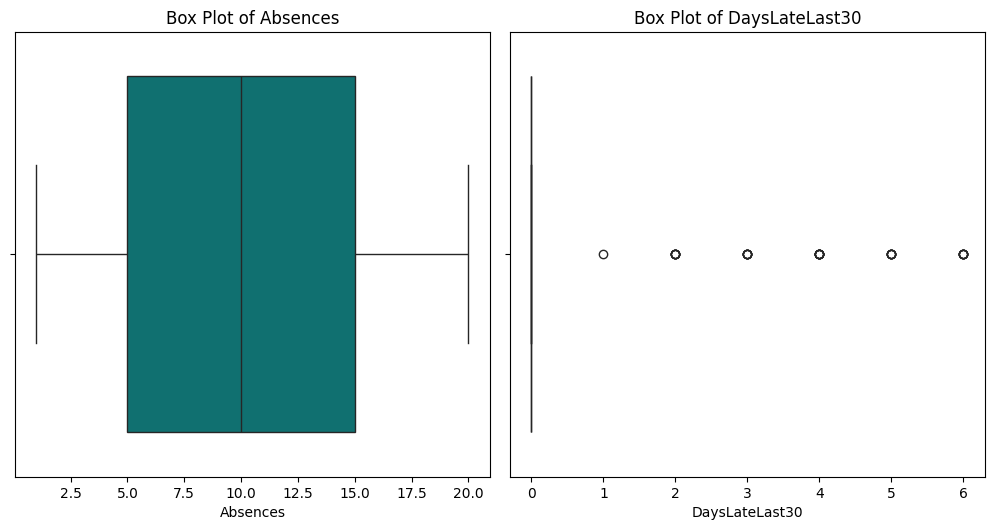

In [18]:
# Variables better suited for box plots (continuous numerical variables)
box_plot_vars = ["Absences", "DaysLateLast30"]

# Create box plots for the selected continuous variables
plt.figure(figsize=(15, 10))  # Set the figure size for box plots

# Loop through the variables for box plots and create plots
for i, var in enumerate(box_plot_vars, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid for box plots
    sns.boxplot(x=df[var], color="teal")  # Create the box plot
    plt.title(f"Box Plot of {var}")  # Title for each box plot
    plt.xlabel(var)  # Label for the x-axis

# Adjust layout for box plots and show the plot
plt.tight_layout()
plt.show()


Let's represent the continuous variables


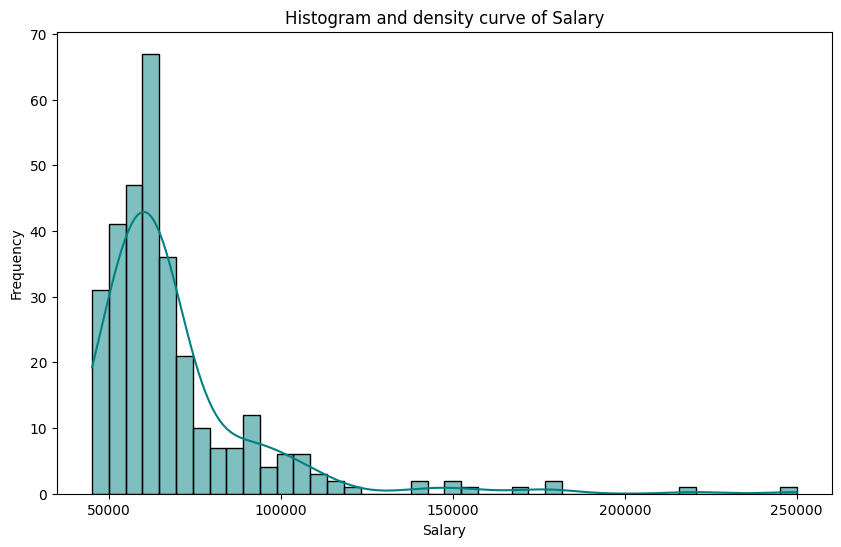

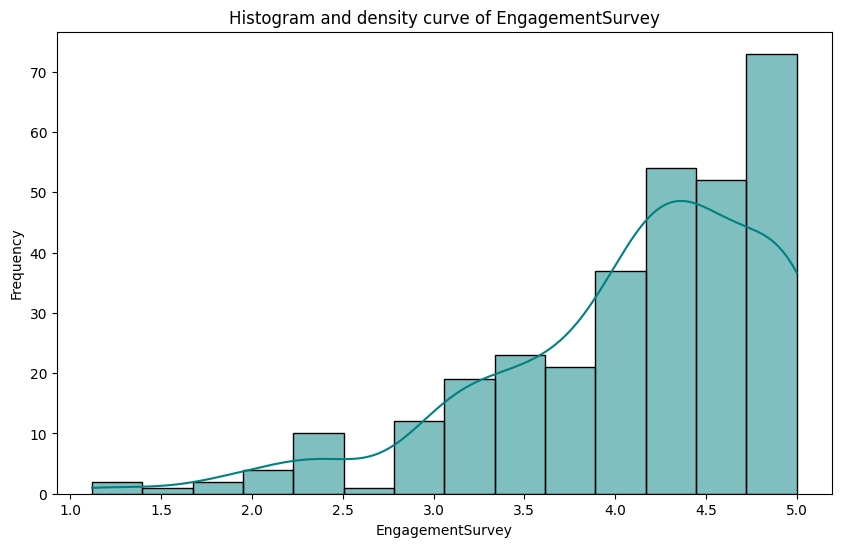

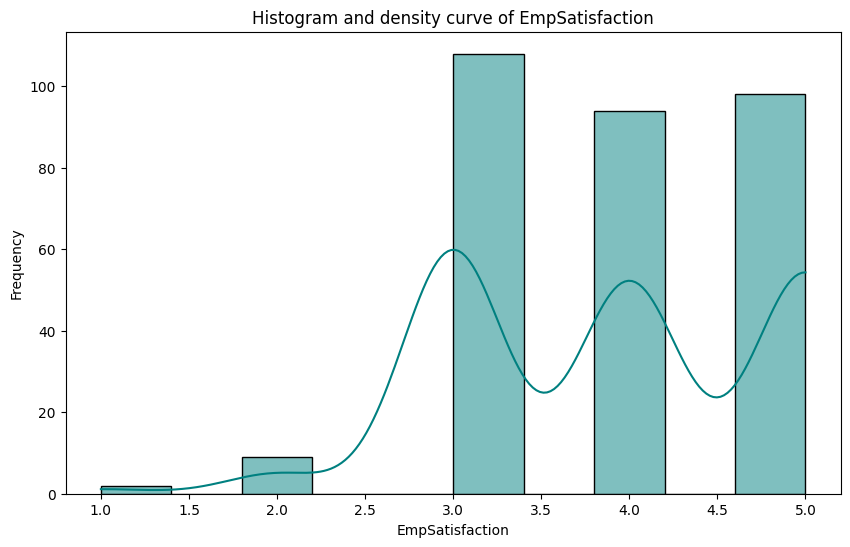

In [19]:
# Selected continuous variables
quant_vars = ["Salary", "EngagementSurvey", "EmpSatisfaction"]

# Create histograms with density curves for each continuous variable
for var in quant_vars:
    plt.figure(figsize=(10, 6))  # Set figure size for each histogram
    sns.histplot(x=df[var].dropna(), kde=True, color="teal")  # Create histogram with density curve
    plt.title(f"Histogram and density curve of {var}")  # Title for the histogram
    plt.xlabel(var)  # Label for the x-axis
    plt.ylabel("Frequency")  # Label for the y-axis
    plt.show()


##  Outlier detection and analysis

In [21]:
# Automatically get numerical variables from df.describe(), excluding datetime types
numeric_vars = [col for col in df.describe().columns if not pd.api.types.is_datetime64_any_dtype(df[col])]

print("Skewness for numerical variables:")
for var in numeric_vars:
    skew_value = df[var].skew()
    print(f"{var}: {skew_value:.3f}")


Skewness for numerical variables:
EmpID: 0.000
MarriedID: 0.416
MaritalStatusID: 1.409
GenderID: 0.267
EmpStatusID: 0.632
DeptID: -1.536
PerfScoreID: -1.248
FromDiversityJobFairID: 2.811
Salary: 3.306
Termd: 0.705
PositionID: -1.232
Zip: 4.105
ManagerID: 0.759
EngagementSurvey: -1.117
EmpSatisfaction: -0.223
SpecialProjectsCount: 1.539
DaysLateLast30: 3.143
Absences: 0.029


The variables with symmetric distributions are: EmpID, GenderID, and Absences. The variables with asymmetric distributions are: FromDiversityJobFairID, DaysLateLast30, DeptID, PerfScoreID, and EngagementSurvey. We will apply the **1.5  IQR rule for outlier detection**  to the variables with symmetric distributions.

Since EmpID is a unique identifier, statistical analysis for outliers is not applicable. GenderID is a categorical variable, so the concept of outliers doesn't apply in the traditional sense. Therefore, outlier detection is pertinent for the Absences variable.

In [28]:
# Calculate Q1 and Q3
Q1 = df['Absences'].quantile(0.25)
Q3 = df['Absences'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Absences'] < lower_bound) | (df['Absences'] > upper_bound)]

print("Detected outliers:")
#print(outliers)


Detected outliers:


So, "Absences" has no outlier


<br>

*FromDiversityJobFairID*, *DeptID*, and *PerfScoreID* are essentially categorical or ordinal variables (or binary, in the case of *FromDiversityJobFairID*). Outlier detection is not particularly meaningful for these.

*DaysLateLast30* and *EngagementSurvey* are continuous numerical variables and show significant skewness.
<br> Since the Isolation Forest method is well-suited for detecting outliers in asymmetric distributions, we will apply it to those variables.

In [37]:
from sklearn.ensemble import IsolationForest


# Select only continuous variables with asymmetric distributions for outlier detection
asym_vars = ['DaysLateLast30', 'EngagementSurvey']

# Extract the subset of data for these variables
data_asym = df[asym_vars].copy()

# Set the contamination parameter (here 10% of data is expected to be outliers)
# and a fixed random state for reproducibility.
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outlier labels (-1 for outliers, 1 for inliers)
outlier_labels = iso_forest.fit_predict(data_asym)

# Add the outlier labels as a new column in the data subset
data_asym['Outlier'] = outlier_labels

# Filter and display the rows identified as outliers (label -1)
outliers = data_asym[data_asym['Outlier'] == -1]
print("Detected outliers in asymmetric variables:")
print(outliers)


Detected outliers in asymmetric variables:
     DaysLateLast30  EngagementSurvey  Outlier
23                2              2.00       -1
32                1              3.14       -1
53                5              2.00       -1
54                3              4.13       -1
64                2              4.30       -1
67                6              1.93       -1
69                4              1.12       -1
72                2              2.30       -1
83                2              3.00       -1
84                5              5.00       -1
85                5              2.30       -1
86                4              2.10       -1
90                6              1.56       -1
91                3              1.20       -1
95                4              2.00       -1
98                2              4.30       -1
105               3              3.97       -1
112               3              3.00       -1
137               3              2.34       -1
188              

**Solutions of handling these outliers**
<br>
<br>
 Winsorization will be applied to the asymmetric continuous variables: *DaysLateLast30* and *EngagementSurvey*
<br>We define the lower and upper bounds at the 5th and 95th percentiles, respectively.


In [38]:

# For DaysLateLast30:
lower_bound_days = df['DaysLateLast30'].quantile(0.05)
upper_bound_days = df['DaysLateLast30'].quantile(0.95)

# For EngagementSurvey:
lower_bound_eng = df['EngagementSurvey'].quantile(0.05)
upper_bound_eng = df['EngagementSurvey'].quantile(0.95)

# Apply winsorization by capping values outside the bounds
df['DaysLateLast30_wins'] = df['DaysLateLast30'].clip(lower=lower_bound_days, upper=upper_bound_days)
df['EngagementSurvey_wins'] = df['EngagementSurvey'].clip(lower=lower_bound_eng, upper=upper_bound_eng)

print("Winsorization applied to 'DaysLateLast30' and 'EngagementSurvey'.")
print("New summary for DaysLateLast30:")
print(df['DaysLateLast30_wins'].describe())

print("\n")
print("New summary for EngagementSurvey:")
print(df['EngagementSurvey_wins'].describe())


Winsorization applied to 'DaysLateLast30' and 'EngagementSurvey'.
New summary for DaysLateLast30:
count    311.000000
mean       0.356913
std        1.076707
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: DaysLateLast30_wins, dtype: float64


New summary for EngagementSurvey:
count    311.000000
mean       4.130000
std        0.734171
min        2.400000
25%        3.690000
50%        4.280000
75%        4.700000
max        5.000000
Name: EngagementSurvey_wins, dtype: float64


 *DaysLateLast30* variable now has a mean of 0.357 and a standard deviation of 1.077, with a minimum of 0 and a maximum of 4.
  <br>  Similarly, the *EngagementSurvey*  has a mean of 4.13 and a standard deviation of 0.734, with a minimum of 2.4 and a maximum of 5.
